In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import somspherez
import healpy as hp
import numpy as np

In [11]:
tmp = np.loadtxt('SDSS_MGS.train')
tmp.shape

(5000, 19)

In [9]:
#just read magnitudes and colors
Data_X=np.loadtxt('SDSS_MGS.train', usecols=(1,2,3,4,5,6,7,8,9), unpack=True).T
np.shape(Data_X)

(5000, 9)

In [5]:
Data_X[0]

array([19.655096, 18.149183, 17.298376, 16.878389, 16.562674,  1.505913,
        0.850807,  0.419987,  0.315715])

In [3]:
#read zspec (or any other extra column)
Data_Y=np.loadtxt('SDSS_MGS.train', usecols=(0,), unpack=True).T
np.shape(Data_Y)

(5000,)

In [14]:
Data_X[:,0]

array([19.655096, 19.844564, 19.314598, ..., 17.954399, 20.643335,
       16.144878])

In [4]:
#create an instance
M=somspherez.SelfMap(Data_X, Data_Y,topology='grid', Ntop=15, iterations=100, periodic='no')

In [5]:
M.create_map() #This actually creates the map using only Data_X

In [6]:
M.evaluate_map() # Will evaluate Data_Y, basically will take mean for every value of Y per cell

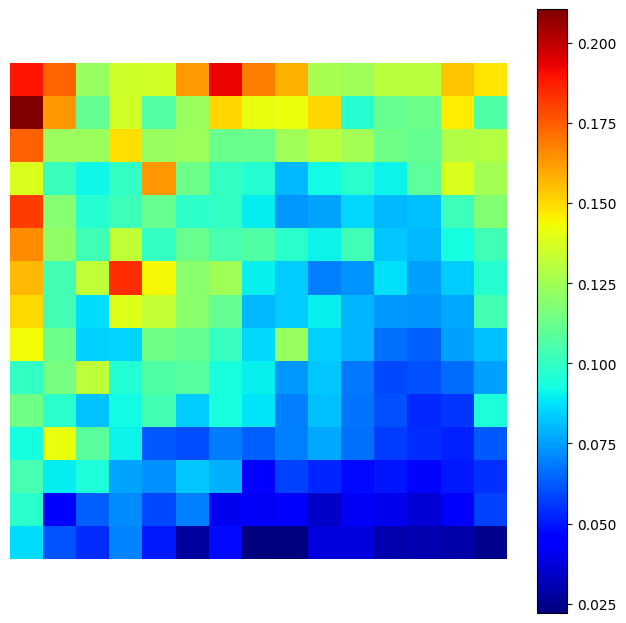

In [7]:
M.plot_map()

In [11]:
#We can evaluate other column, for example column 0 from X
M.evaluate_map(inputY=Data_X[:,0])

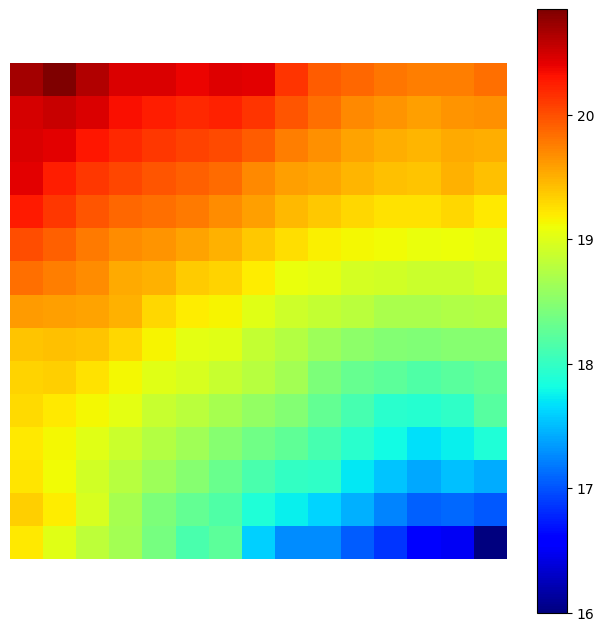

In [12]:
M.plot_map()

In [13]:
#Every time the map is created it will be different given the random weights
M.create_map()

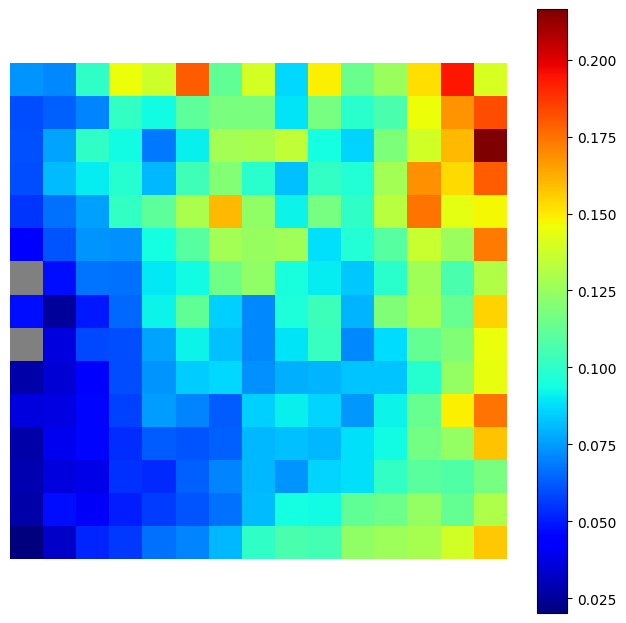

In [14]:
M.evaluate_map()
M.plot_map()

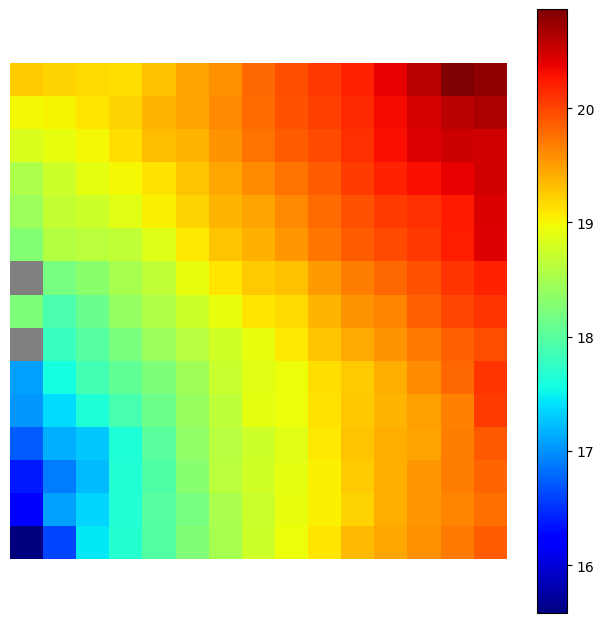

In [16]:
M.evaluate_map(inputY=Data_X[:,0])
M.plot_map()

In [17]:
#Spherical coordinates
M_sph=somspherez.SelfMap(Data_X, Data_Y,topology='sphere', Ntop=8, iterations=100)

In [18]:
M_sph.create_map()

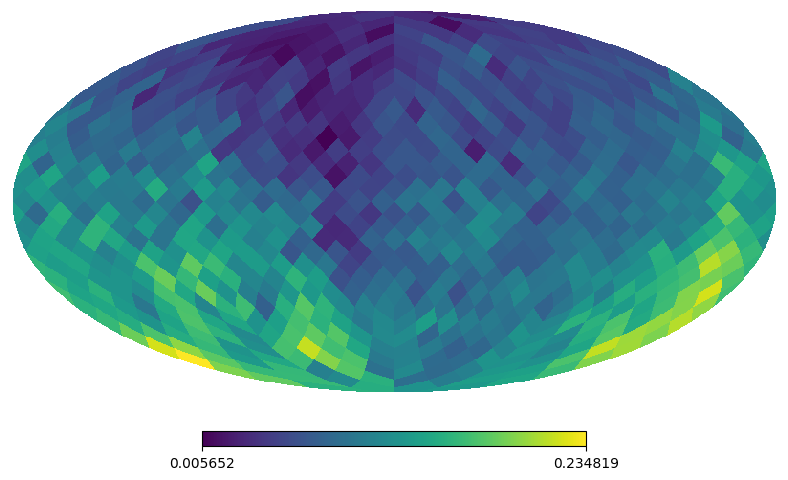

In [19]:
M_sph.evaluate_map()
M_sph.plot_map()


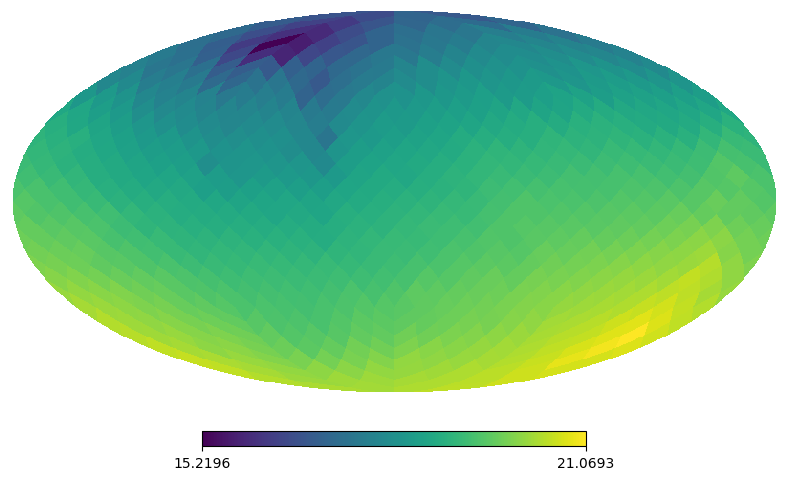

In [20]:
M_sph.evaluate_map(inputY=Data_X[:,0])
M_sph.plot_map()

## Test with fixed weights and fixed order of data presented

In [22]:
# To test with fixed weights, so answer is always the same (to be able to compare)
# need more iterations to make sure it converges
M=somspherez.SelfMap(Data_X, Data_Y,topology='grid', Ntop=15, iterations=300, periodic='no')
print(M.nDim, 'dimensions') #dimensions
print(M.npix, 'cells') #cells

9 dimensions
225 cells


In [23]:
#weights are supposed to be random, but we can make them linear for testing
W = np.linspace(0,20,M.nDim*M.npix).reshape(M.nDim,M.npix)
#look carefully onhow this was created, elements go from 0 to 20 with a difference of 
#W[0][1]-W[0][0] = 0.009881422924901186
print('dw = ', W[0][1]-W[0][0])
np.shape(W)

dw =  0.009881422924901186


(9, 225)

In [30]:
W.shape

(9, 225)

In [25]:
M.create_map(inputs_weights=W, random_order=False)

In [26]:
M.evaluate_map()

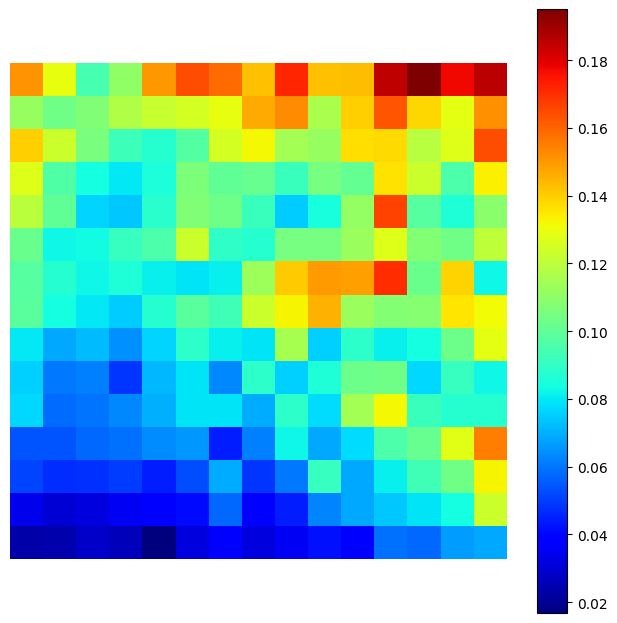

In [27]:
M.plot_map()

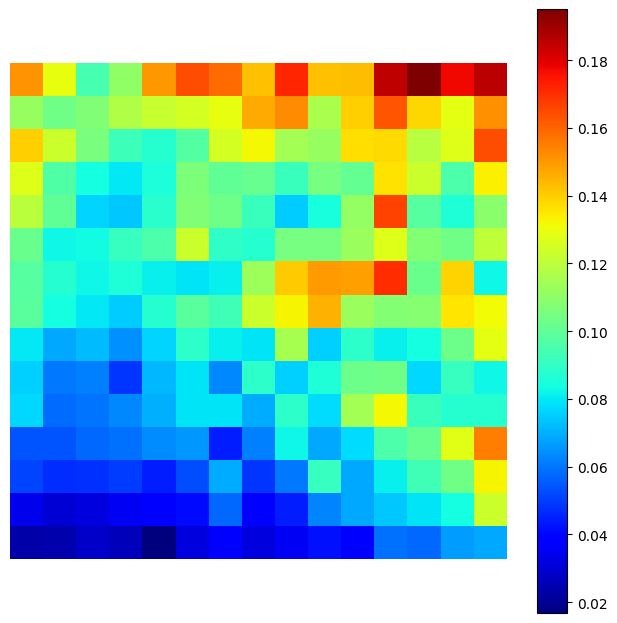

In [28]:
# If I create the map again, results should be the same
M.create_map(inputs_weights=W, random_order=False)
M.evaluate_map()
M.plot_map()

In [31]:
# To compare, we can use the resulting weights for cell 0
M.weights[:,0]

array([16.1580654 , 14.33966559, 13.50589005, 13.13014191, 12.84625795,
        1.81839981,  0.83377553,  0.37574814,  0.28388396])

In [32]:
# in spherical
M_sph=somspherez.SelfMap(Data_X, Data_Y,topology='sphere', Ntop=8, iterations=300)

In [33]:
#weights, the number of pixels is different
#weights are supposed to be random, but we can make them linear for testing
W = np.linspace(0,20,M_sph.nDim*M_sph.npix).reshape(M_sph.nDim,M_sph.npix)
#look carefully onhow this was created, elements go from 0 to 20 with a difference of 
#W[0][1]-W[0][0] = 0.009881422924901186
print('dw = ', W[0][1]-W[0][0])
np.shape(W)


dw =  0.0028939372015627262


(9, 768)

In [35]:
M_sph.create_map(inputs_weights=W, random_order=False)

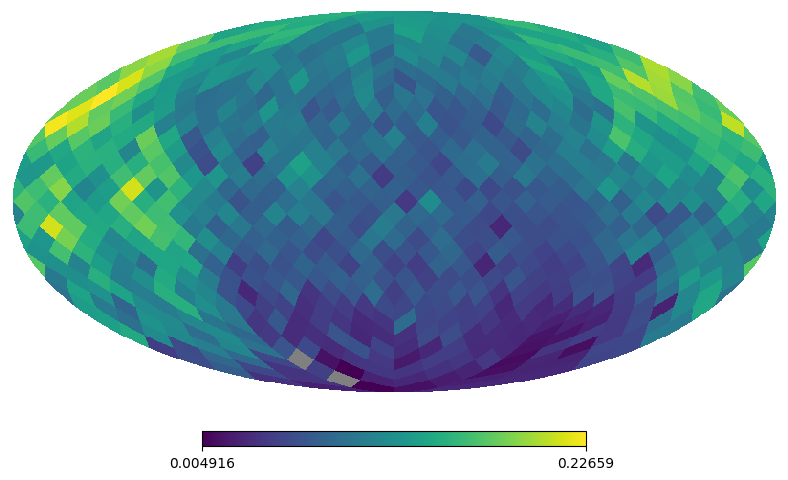

In [36]:
M_sph.evaluate_map()
M_sph.plot_map()

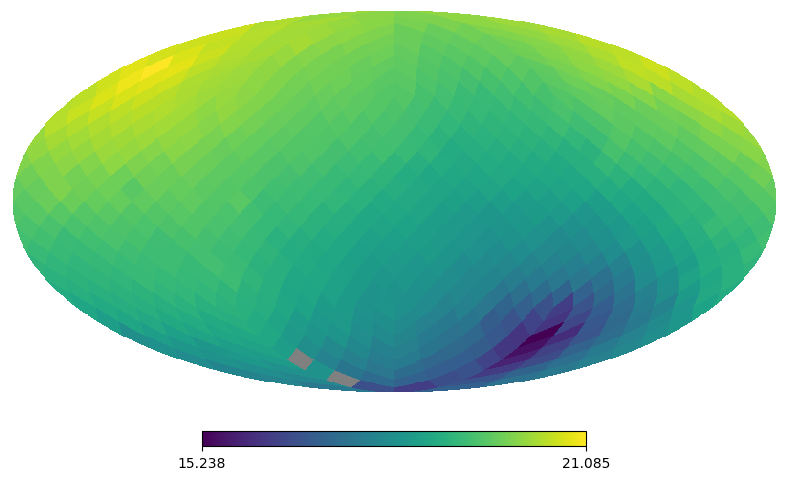

In [38]:
M_sph.evaluate_map(inputY=Data_X[:,0])
M_sph.plot_map()


In [39]:
M_sph.create_map(inputs_weights=W, random_order=False)

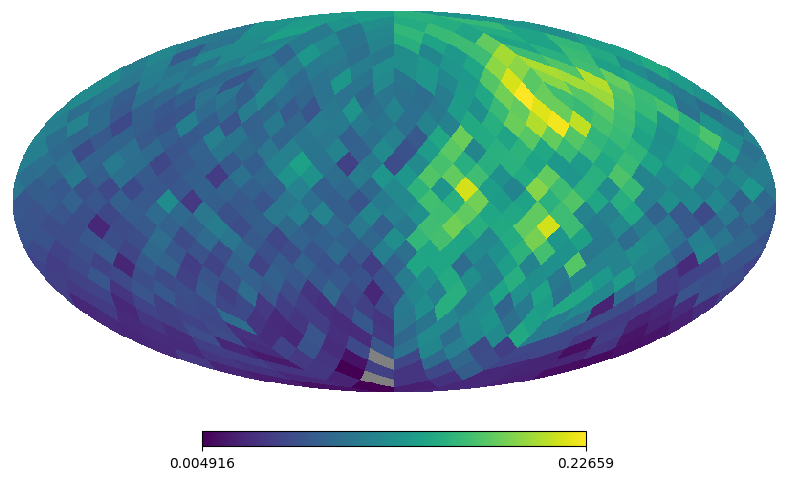

In [40]:
M_sph.evaluate_map()
M_sph.plot_map()

In [41]:
#Weights for cell 0
M_sph.weights[:,0]

array([20.09034726, 18.18745936, 17.18432217, 16.73921586, 16.40915885,
        1.9028879 ,  1.00313718,  0.44510632,  0.330057  ])

In [42]:
# hexagonal topology with periodic conditions
M_hex=somspherez.SelfMap(Data_X, Data_Y,topology='hex', Ntop=15, iterations=300, periodic='yes')
print(M_hex.nDim, 'dimensions') #dimensions
print(M_hex.npix, 'cells') #cells

9 dimensions
270 cells


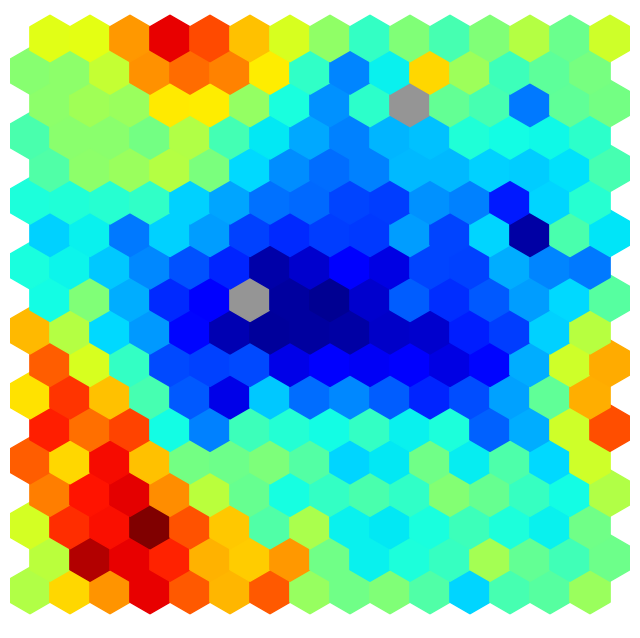

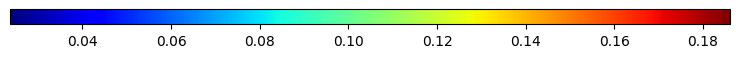

In [43]:
W=np.linspace(0,20,M_hex.nDim*M_hex.npix).reshape(M_hex.nDim,M_hex.npix)
M_hex.create_map(inputs_weights=W, random_order=False)
M_hex.evaluate_map()
M_hex.plot_map()

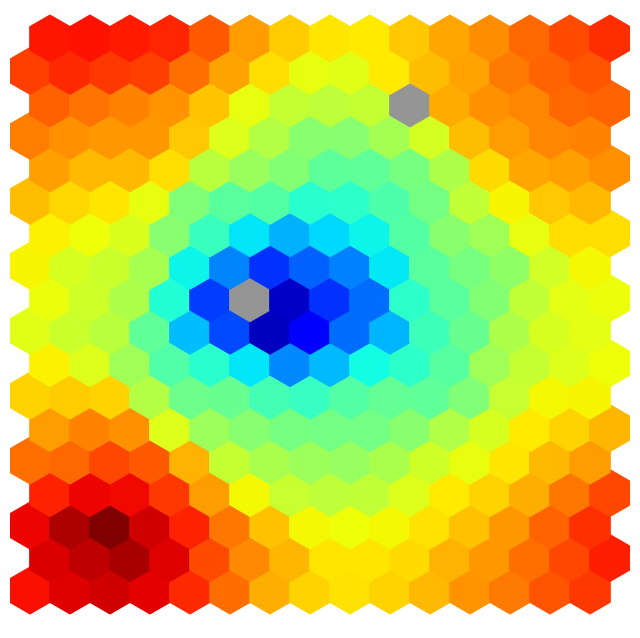

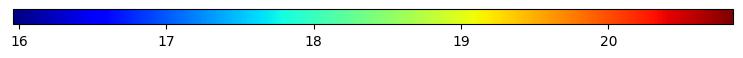

In [44]:
M_hex.evaluate_map(inputY=Data_X[:,0])
M_hex.plot_map()

# Random example test

In [45]:
X_R=np.random.rand(45000).reshape(5000,9)

In [46]:
np.shape(X_R)

(5000, 9)

In [47]:
M_sph_R=somspherez.SelfMap(X_R, X_R[:,0],topology='sphere', Ntop=8, iterations=100)

In [48]:
M_sph_R.create_map()

In [49]:
M_sph_R.evaluate_map()

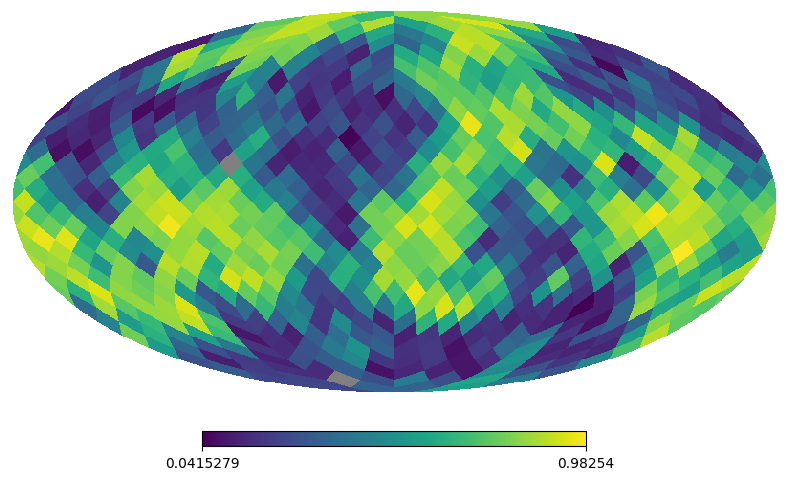

In [50]:
M_sph_R.plot_map()

In [51]:
M_sph_R.evaluate_map(inputY=X_R[:,0])

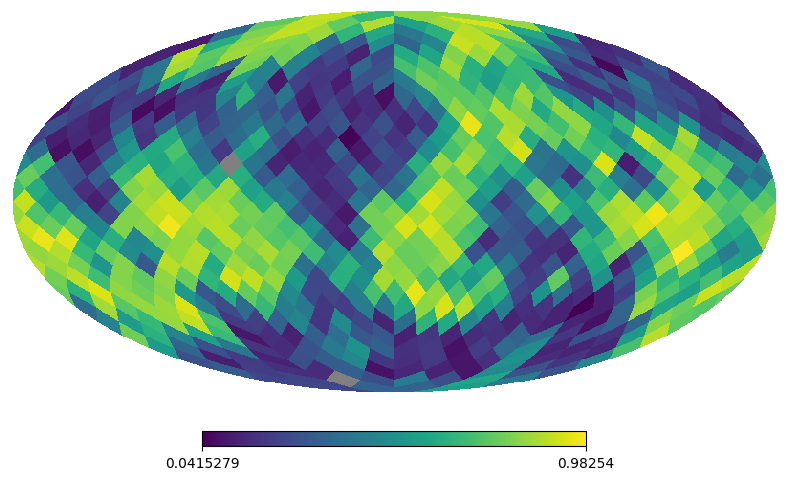

In [52]:
M_sph_R.plot_map()

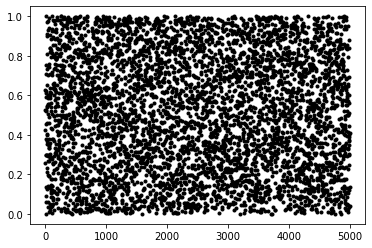

In [54]:
plt.plot(X_R[:,0],'k.')

In [55]:
M_sph_R.ivals[0]


[318, 681, 790, 970, 1724, 3688, 4788, 4824]

In [57]:
M_sph_R.npix

768

In [56]:
HR=np.zeros(M_sph_R.npix)
MR=np.zeros(M_sph_R.npix)
for i in range(M_sph_R.npix):
    try:
        HR[i]=len(M_sph_R.ivals[i])
        MR[i]=np.mean(M_sph_R.yvals[i])
    except:
        pass

In [59]:
HR.shape

(768,)

In [60]:
MR.shape

(768,)

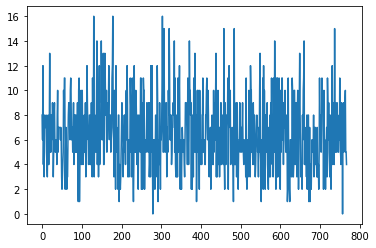

In [61]:
plt.plot(HR)

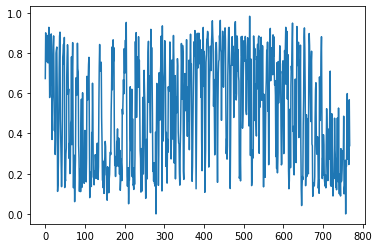

In [62]:
plt.plot(MR)

In [63]:
np.mean(HR), np.mean(MR)

(6.510416666666667, 0.5099541794468611)

In [64]:
HR[0]

8.0

In [65]:
np.std(HR)

2.893940478492181

(array([ 14.,  39.,  59.,  83., 115., 107.,  83.,  86.,  63.,  45.,  36.,
         17.,   7.,   6.,   8.]),
 array([ 0.        ,  1.06666667,  2.13333333,  3.2       ,  4.26666667,
         5.33333333,  6.4       ,  7.46666667,  8.53333333,  9.6       ,
        10.66666667, 11.73333333, 12.8       , 13.86666667, 14.93333333,
        16.        ]),
 <BarContainer object of 15 artists>)

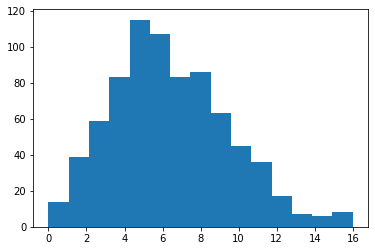

In [66]:
plt.hist(HR, bins=15)


(array([ 3., 10., 51., 64., 47., 48., 41., 40., 32., 32., 30., 32., 44.,
        39., 41., 58., 56., 58., 34.,  8.]),
 array([0.        , 0.04912702, 0.09825403, 0.14738105, 0.19650807,
        0.24563508, 0.2947621 , 0.34388912, 0.39301613, 0.44214315,
        0.49127016, 0.54039718, 0.5895242 , 0.63865121, 0.68777823,
        0.73690525, 0.78603226, 0.83515928, 0.8842863 , 0.93341331,
        0.98254033]),
 <BarContainer object of 20 artists>)

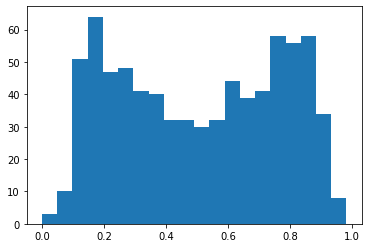

In [67]:
plt.figure()
plt.hist(MR, bins=20)

(array([ 47., 114., 101.,  56.,  64.,  68.,  82., 106.,  97.,  33.]),
 array([0.07450898, 0.16287611, 0.25124324, 0.33961037, 0.42797751,
        0.51634464, 0.60471177, 0.6930789 , 0.78144603, 0.86981316,
        0.95818029]),
 <BarContainer object of 10 artists>)

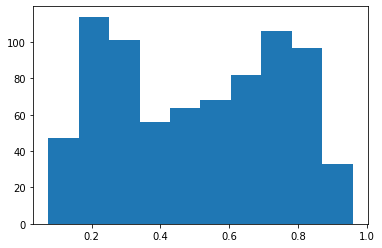

In [68]:
plt.hist(M_sph_R.weights[4])

In [69]:
len(M_sph_R.weights[0])

768

In [70]:
M_sph=somspherez.SelfMap(Data_X, Data_Y,topology='sphere', Ntop=8, iterations=100)

In [71]:
M_sph.create_map()

In [72]:
M_sph.evaluate_map()

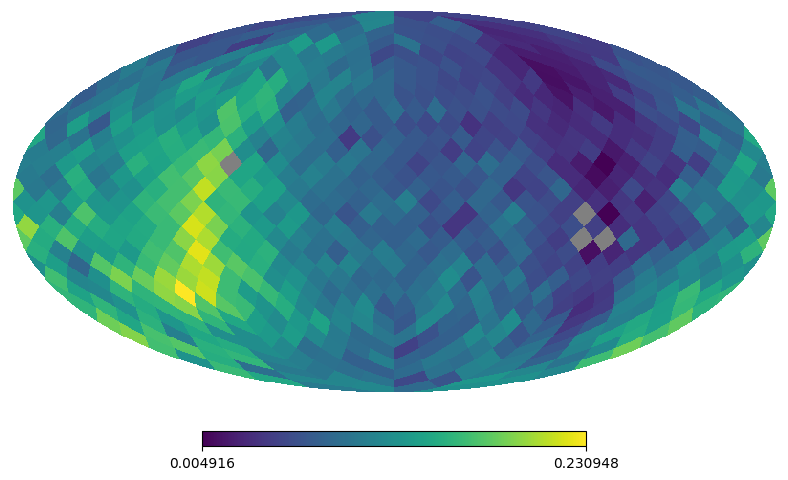

In [73]:
M_sph.plot_map()

In [74]:
H=np.zeros(M_sph.npix)
MM=np.zeros(M_sph.npix)
for i in range(M_sph.npix):
    try:
        H[i]=len(M_sph.ivals[i])
        MM[i]=np.mean(M_sph.yvals[i])
    except:
        pass

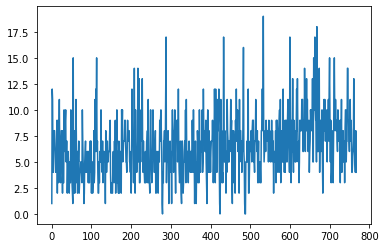

In [75]:
plt.plot(H)

(array([ 18., 103., 180., 210., 149.,  65.,  25.,  11.,   5.,   2.]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <BarContainer object of 10 artists>)

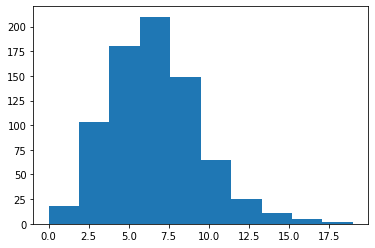

In [76]:
plt.hist(H)

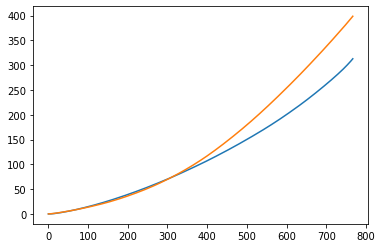

In [77]:
MM1=(MM-np.min(MM))
MM1/=np.max(MM1)
MR1=(MR-np.min(MR))
MR1/=np.max(MR1)
plt.plot(np.cumsum(np.sort(MM1)))
plt.plot(np.cumsum(np.sort(MR1)))

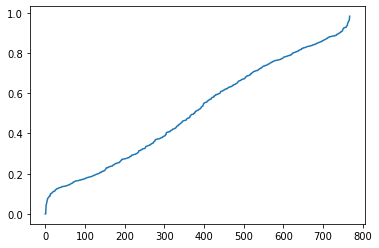

In [78]:
plt.plot(np.sort(MR))

(array([0.16927083, 1.49739583, 1.23697917, 1.0546875 , 0.83333333,
        0.80729167, 1.08072917, 1.2890625 , 1.484375  , 0.546875  ]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

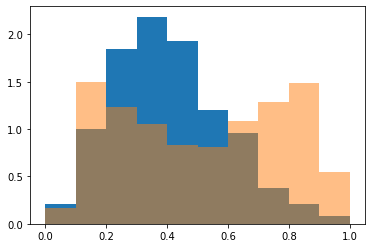

In [80]:
plt.hist(MM1, density=True, stacked=True)
plt.hist(MR1, density=True, stacked=True, alpha=0.5)